<a href="https://colab.research.google.com/github/sranifp/PBA-Sentimen-Analisis-UBER/blob/main/EDA_BoW_UBER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

# Perintah untuk mengaitkan Google Drive Anda
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path_di_drive = '/content/drive/MyDrive/Pengolahan Bahasa Alami/Bu IRMA/Tugas Individu/Data/uber_reviews_clean.csv'

In [3]:
# Load the dataset
df_clean = pd.read_csv(file_path_di_drive)
display(df_clean.head())

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,content_no_punct,content_no_emoji,content_tokens,content_final_clean
0,501420d1-a032-4981-bd64-fb948333bd2f,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,doliczają dodatkowe opłaty ~10% po zakończonej...,1,0,4.601.10001,2025-10-28 09:51:39,NaN,NaN,4.601.10001,doliczają dodatkowe opłaty 10 po zakończonej u...,doliczają dodatkowe opłaty 10 po zakończonej u...,"['doliczają', 'dodatkowe', 'opłaty', '10', 'po...",doliczają dodatkowe opłaty 10 po zakończonej u...
1,5dc1a519-a151-4c46-88df-7aae80f24a3d,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,excellent service,5,0,4.601.10001,2025-10-28 09:48:31,NaN,NaN,4.601.10001,excellent service,excellent service,"['excellent', 'service']",excellent
2,2fa137d8-0442-4b81-8ae4-3c2d1bf5120a,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,ابلكيشن تحفة و كل الكباتن بتاعتة محترمين,5,0,4.601.10001,2025-10-28 09:46:39,NaN,NaN,4.601.10001,ابلكيشن تحفة و كل الكباتن بتاعتة محترمين,ابلكيشن تحفة و كل الكباتن بتاعتة محترمين,"['ابلكيشن', 'تحفة', 'و', 'كل', 'الكباتن', 'بتا...",ابلكيشن تحفة و كل الكباتن بتاعتة محترمين
3,ce296caf-168a-4876-8ea3-7907673d20ad,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,cool,5,0,NaN,2025-10-28 09:36:33,NaN,NaN,NaN,cool,cool,['cool'],cool
4,7ec3b59a-2129-4ee7-b7ae-a5ef7acdcbe0,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,"app says 1 min waiting, turned out waiting for...",1,0,4.601.10001,2025-10-28 09:30:28,NaN,NaN,4.601.10001,app says 1 min waiting turned out waiting for ...,app says 1 min waiting turned out waiting for ...,"['app', 'says', '1', 'min', 'waiting', 'turned...",say 1 waiting turned waiting 10 waiting fee ta...


# EDA

**Distribusi panjang teks (karakter & token)**

In [4]:
# Calculate review length in characters
df_clean['review_length_char'] = df_clean['content_final_clean'].apply(lambda x: len(str(x)))


--- Statistik Panjang Ulasan (Karakter dan Token) ---
Karakter:
count    1.368102e+06
mean     4.174855e+01
std      5.850193e+01
min      1.000000e+00
25%      7.000000e+00
50%      1.700000e+01
75%      5.100000e+01
max      1.831000e+03
Name: review_length_char, dtype: float64

Token:
count    1.368102e+06
mean     6.382226e+00
std      8.993828e+00
min      1.000000e+00
25%      1.000000e+00
50%      3.000000e+00
75%      8.000000e+00
max      2.630000e+02
Name: review_length_final, dtype: float64


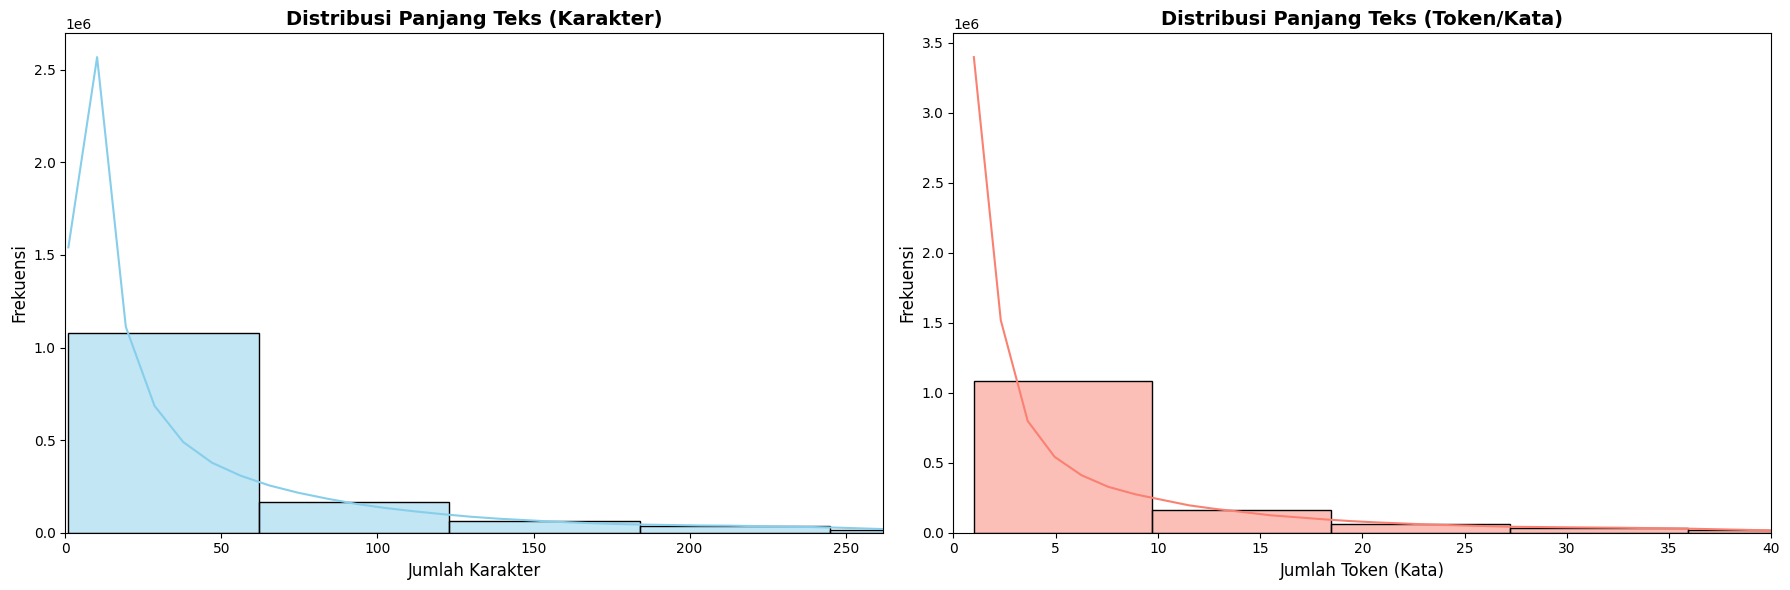

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate review length in characters
df_clean['review_length_char'] = df_clean['content_final_clean'].apply(lambda x: len(str(x)))
# Calculate review length in tokens (words)
df_clean['review_length_final'] = df_clean['content_final_clean'].apply(lambda x: len(str(x).split()))


# Tampilkan statistik deskriptif
print("\n--- Statistik Panjang Ulasan (Karakter dan Token) ---")
print("Karakter:")
print(df_clean['review_length_char'].describe())
print("\nToken:")
print(df_clean['review_length_final'].describe())

# Visualisasi gabungan
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot 1: Distribusi Panjang Karakter
sns.histplot(df_clean['review_length_char'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribusi Panjang Teks (Karakter)', fontsize=14, weight='bold')
axes[0].set_xlabel('Jumlah Karakter', fontsize=12)
axes[0].set_ylabel('Frekuensi', fontsize=12)
axes[0].set_xlim(0, df_clean['review_length_char'].quantile(0.99)) # Batasi untuk fokus

# Plot 2: Distribusi Panjang Token
sns.histplot(df_clean['review_length_final'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribusi Panjang Teks (Token/Kata)', fontsize=14, weight='bold')
axes[1].set_xlabel('Jumlah Token (Kata)', fontsize=12)
axes[1].set_ylabel('Frekuensi', fontsize=12)
axes[1].set_xlim(0, df_clean['review_length_final'].quantile(0.99)) # Batasi untuk fokus

plt.tight_layout()
plt.show()

**Distribusi Frekuensi Kata (Top N Word Frequency)**

/tmp/ipython-input-784911812.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Word', data=df_freq, palette='mako')


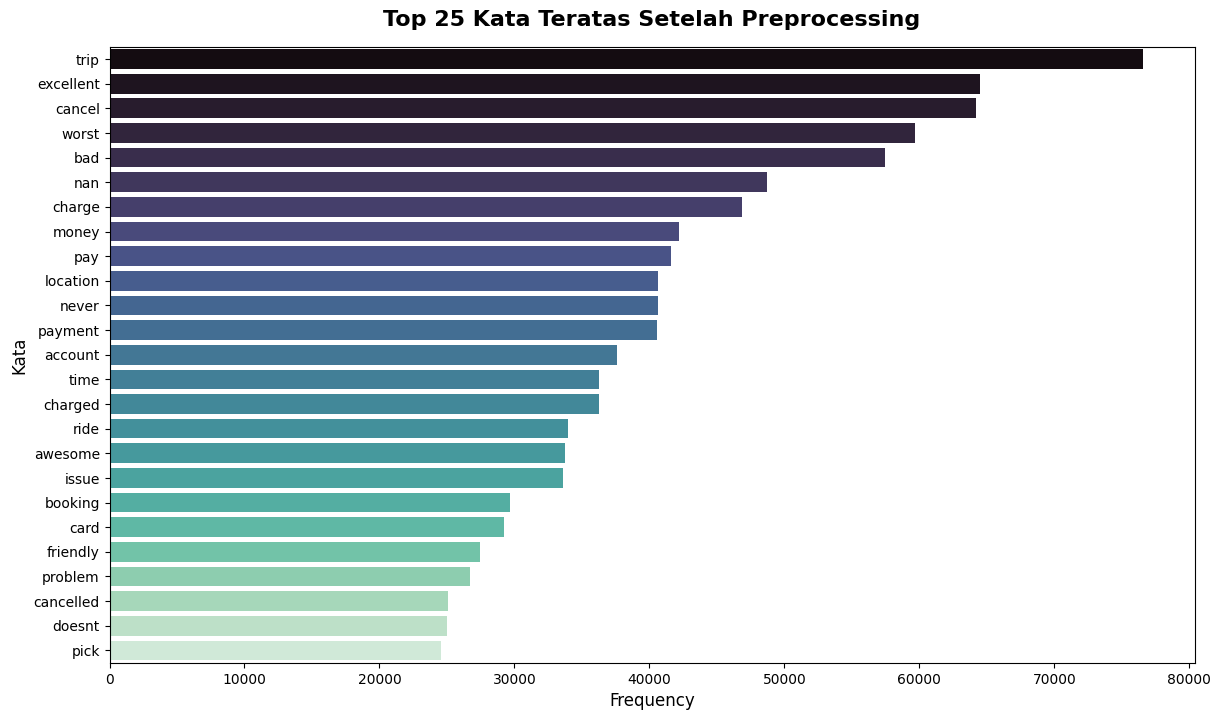


--- Top 25 Kata Teratas ---
         Word  Frequency
0        trip      76560
1   excellent      64492
2      cancel      64186
3       worst      59698
4         bad      57443
5         nan      48735
6      charge      46825
7       money      42190
8         pay      41628
9    location      40638
10      never      40604
11    payment      40527
12    account      37583
13       time      36257
14    charged      36245
15       ride      33955
16    awesome      33746
17      issue      33572
18    booking      29697
19       card      29236
20   friendly      27438
21    problem      26673
22  cancelled      25082
23     doesnt      24982
24       pick      24559


In [6]:
from nltk import FreqDist
import pandas as pd

# Gabungkan semua teks bersih menjadi satu list kata
all_words = ' '.join(df_clean['content_final_clean'].astype(str)).split()

# Hitung frekuensi
fdist = FreqDist(all_words)

# Ambil 25 kata teratas
top_n = 25
df_freq = pd.DataFrame(fdist.most_common(top_n), columns=['Word', 'Frequency'])

plt.figure(figsize=(14, 8))
# Bar plot horizontal
sns.barplot(x='Frequency', y='Word', data=df_freq, palette='mako')

plt.title(f'Top {top_n} Kata Teratas Setelah Preprocessing', fontsize=16, weight='bold', pad=15)
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Kata', fontsize=12)
plt.show()

print(f"\n--- Top {top_n} Kata Teratas ---")
print(df_freq)

**Distribusi Skor (Rating)**

/tmp/ipython-input-1825481608.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='score', palette='viridis', order=sorted(df_clean['score'].unique()))


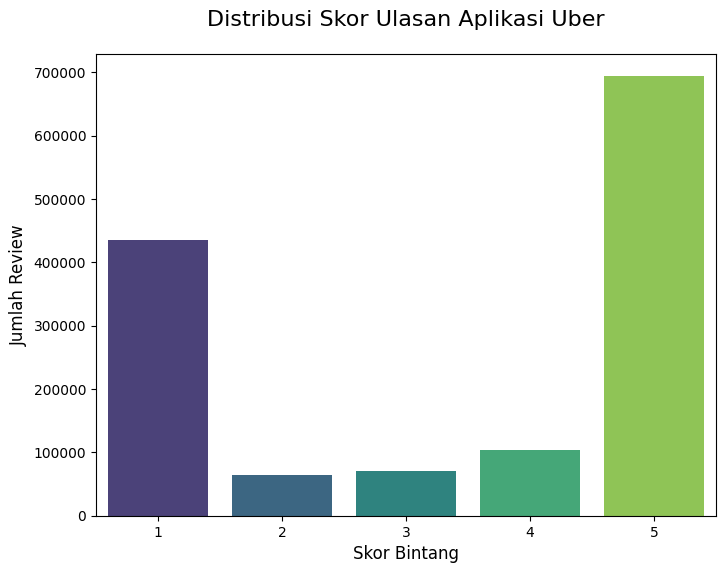


--- Jumlah Review per Skor ---
score
1    434554
2     64610
3     71145
4    103103
5    694690
Name: count, dtype: int64


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
# Mengubah 'score' menjadi string/kategori untuk plot count yang lebih baik
sns.countplot(data=df_clean, x='score', palette='viridis', order=sorted(df_clean['score'].unique()))
plt.title('Distribusi Skor Ulasan Aplikasi Uber', fontsize=16, pad=20)
plt.xlabel('Skor Bintang', fontsize=12)
plt.ylabel('Jumlah Review', fontsize=12)
plt.show()

print("\n--- Jumlah Review per Skor ---")
print(df_clean['score'].value_counts().sort_index())

**Analisis Panjang Ulasan vs. Skor (Length Analysis)**

/tmp/ipython-input-1264478269.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='score', y='review_length_final', palette='magma')


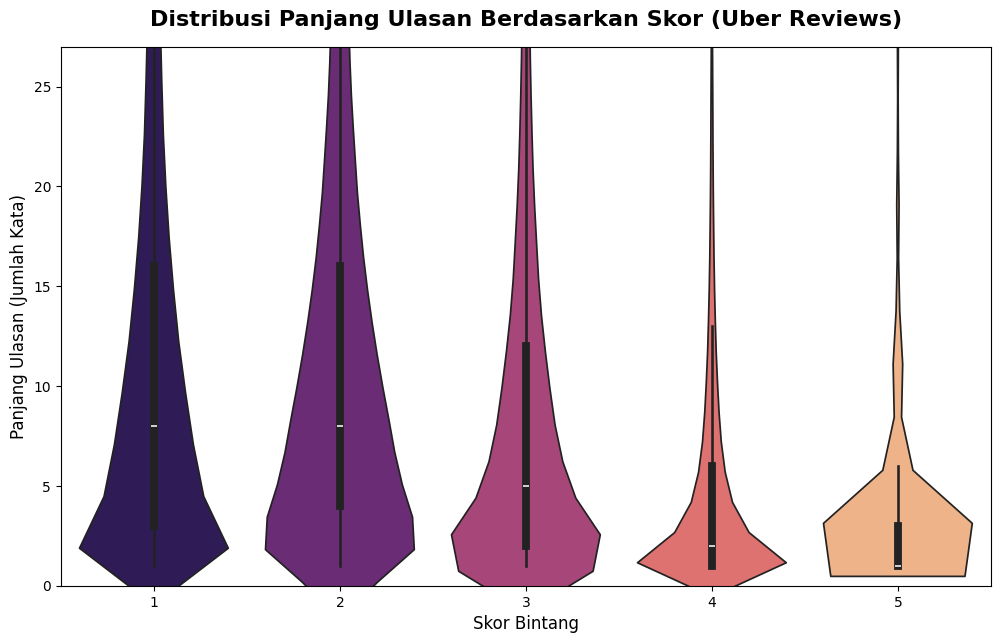


--- Statistik Deskriptif Panjang Ulasan Berdasarkan Skor ---
          count       mean        std  min  25%  50%   75%    max
score                                                            
1      434554.0  11.366251  11.490460  1.0  3.0  8.0  16.0  254.0
2       64610.0  11.809132  11.197599  1.0  4.0  8.0  16.0  157.0
3       71145.0   8.884588   9.840608  1.0  2.0  5.0  12.0  178.0
4      103103.0   5.083189   6.852582  1.0  1.0  2.0   6.0  148.0
5      694690.0   2.696328   3.925189  1.0  1.0  1.0   3.0  263.0


In [8]:
# Pastikan kolom ini sudah ada, jika belum, jalankan:
df_clean['review_length_final'] = df_clean['content_final_clean'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(12, 7))
# Menggunakan Violin Plot untuk melihat distribusi kepadatan data di setiap skor
sns.violinplot(data=df_clean, x='score', y='review_length_final', palette='magma')

plt.title('Distribusi Panjang Ulasan Berdasarkan Skor (Uber Reviews)', fontsize=16, weight='bold', pad=15)
plt.xlabel('Skor Bintang', fontsize=12)
plt.ylabel('Panjang Ulasan (Jumlah Kata)', fontsize=12)

# Batasi sumbu y hingga kuantil ke-95 untuk menghindari outlier ekstrem
y_max = df_clean['review_length_final'].quantile(0.95)
plt.ylim(0, y_max + 1)
plt.show()

print("\n--- Statistik Deskriptif Panjang Ulasan Berdasarkan Skor ---")
print(df_clean.groupby('score')['review_length_final'].describe())

**Visualisasi Word Cloud**

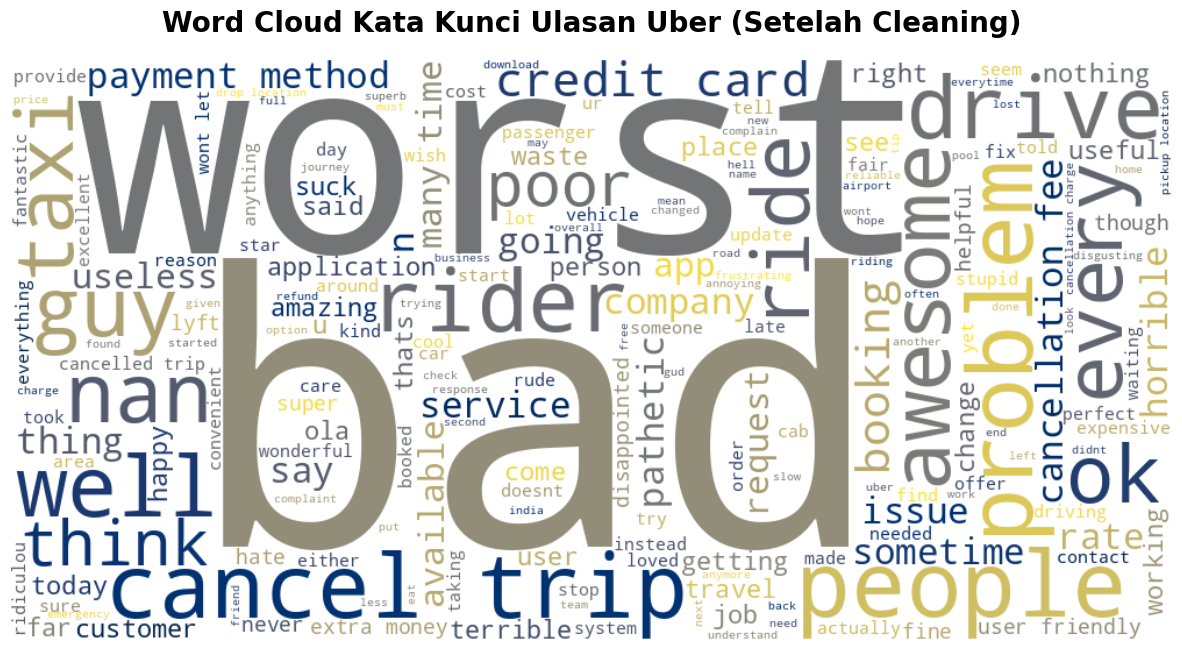

In [9]:
from wordcloud import WordCloud

# Gabungkan semua teks bersih menjadi satu string besar
all_text = ' '.join(df_clean['content_final_clean'].astype(str))

# Buat objek WordCloud
wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    colormap='cividis',
    min_font_size=5
).generate(all_text)

# Tampilkan gambar
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Kata Kunci Ulasan Uber (Setelah Cleaning)', fontsize=20, weight='bold', pad=20)
plt.show()

# Analisa BoW (Bag of Words)

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Inisialisasi CountVectorizer
# max_features=1000: Batasi kosakata hingga 1000 kata dengan frekuensi tertinggi
bow_vectorizer = CountVectorizer(max_features=1000)

# Terapkan BoW pada kolom 'content_final_clean'
# fit_transform: Belajar kosakata (fit) dan terapkan perubahan (transform)
bow_matrix = bow_vectorizer.fit_transform(df_clean['content_final_clean'].astype(str))

# --- MENAMPILKAN HASIL ---

print("\n✅ Proses Bag of Words Selesai.")

# Tampilkan bentuk matriks yang dihasilkan (jumlah review, jumlah kata unik)
print(f"Bentuk Matriks BoW: {bow_matrix.shape}")

# Buat DataFrame dari matriks BoW untuk melihat hasilnya
df_bow = pd.DataFrame(bow_matrix.toarray(), columns=bow_vectorizer.get_feature_names_out())

print("\n--- Contoh Hasil Bag of Words (5 baris pertama, 10 kolom pertama) ---")
print(df_bow.iloc[:5, :10])

print("\n--- Contoh Kata dalam Kosakata (Vocabulary) ---")
# Menampilkan 20 kata pertama yang menjadi fitur (kolom)
print(list(bow_vectorizer.get_feature_names_out()[:20]))


✅ Proses Bag of Words Selesai.
Bentuk Matriks BoW: (1368102, 1000)

--- Contoh Hasil Bag of Words (5 baris pertama, 10 kolom pertama) ---
   10  100  12  15  1st  20  200  25  30  3rd
0   1    0   0   0    0   0    0   0   0    0
1   0    0   0   0    0   0    0   0   0    0
2   0    0   0   0    0   0    0   0   0    0
3   0    0   0   0    0   0    0   0   0    0
4   1    0   0   0    0   0    0   0   0    0

--- Contoh Kata dalam Kosakata (Vocabulary) ---
['10', '100', '12', '15', '1st', '20', '200', '25', '30', '3rd', '40', '45', '50', '500', '60', 'able', 'absolute', 'absolutely', 'ac', 'accept']
